In [371]:
#!pip install nltk
#!pip install emoji
#!pip install regex
#!pip install advertools
#!pip install translate
#!pip install textblob
#!pip install spacy-langdetect
#!pip install langid
#!pip install multidict

In [382]:
import pandas as pd
import re
import string
import spacy
import camel_tools
import nltk
nltk.download('punkt')
import emoji
import regex
import advertools as adv
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import TruncatedSVD
import wordcloud
import multidict as multidict
import os
import arabic_reshaper
from bidi.algorithm import get_display

[nltk_data] Downloading package punkt to /Users/maha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/maha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [355]:
#helper functions

def tokenize_word(text):
    """
    This function separate a sentence into s list of words using nltk library
    """
    
    text=str(text)
    return nltk.word_tokenize(text)
    

    
def emoji_count(text):
    """
    This funtion counts number of emojies in a text
    """
    
    text=[str(text)]
    emoji_summary = adv.extract_emoji(text)
    return emoji_summary['emoji_counts'][0]




def convert_emoji_to_text(text):
    """
    This function converts emojies to texts using demojize 
    """
    
    text=str(text)
    return emoji.demojize(text, delimiters=(" ", " "))




def change_emoji_description(mylist):
    """
    This function changes emojies description to one arabic word "ايموجي"
    """
    
    mylist=mylist.split(' ')
    for i,word in enumerate(mylist):
        if(any(c.islower() for c in word)):
            mylist[i]='ايموجي'
    return ' '.join(mylist)



def remove_stop_word(mylist):
    """
    This function removes arabic stop words from texts
    """
    
    stop_words=stopwords.words('arabic')
    mylist=mylist.split(' ')
    for i, val in enumerate(mylist):
        if(val in stop_words):
               mylist.remove(val)
    return ' '.join(mylist)



def remove_numbers_and_latin_chars(text):
    """
    This function removes any non arabic letters from texts
    """
    
    pattern = r'[a-z A-Z 0-9 ﷺ ٠١٢٣٤٥٦٧٨٩ .: ⃣◈!@#\➘✓ /$%^&*()_+;={,-/|?><~"}]'
    new_text=re.sub(pattern, ' ',  str(text))
    return new_text

def count_repeated(type):
    if(type==4):
        return 1
    else:
        return 0
    
    
def show_confusion_matrix(y_test,y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    plt.figure(dpi=150)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,fmt="d")
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
def prepare_cloud_word(tokens):
    word_cloud_array=[]
    for row in df['Tokens']:
        for token in row:
            if (token != 'ايموجي'):
                word_cloud_array.append(token)
    return word_cloud_array

In [394]:
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence:
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def show_cloud(text):

    for word in text:
        try:
            word = arabic_reshaper.reshape(word)
            word = get_display(word)
        except:
            continue


    wc = WordCloud(font_path='fonts/NotoNaskhArabic-Regular.ttf',background_color="white", max_words=1000)
    # generate word cloud
    wc.generate_from_frequencies(getFrequencyDictForText(text))

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [309]:
df=pd.read_csv("Labeled_Tweets.csv")
df.head(3)

,Tweet,Type
0,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...,1.0
1,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...,1.0
2,عفوا موقع ابشر لما اضغط ع تسجيل مواليد يقولي ل...,1.0


## Data to work on consists of tweets which are mentions to @Tawakkalna_Care customer service account on twitter, and a categorization of tweet into 5 types:
    
    Noise    |  0
    Question |  1
    Answer   |  2
    Comment  |  3
    Repeated |  4

## Distribution of categories (types) as a bar chart

<AxesSubplot:>

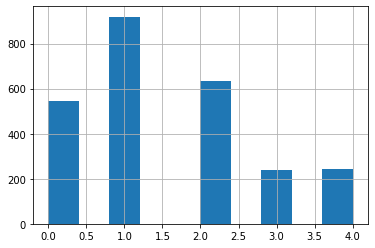

In [310]:
df['Type'].hist()

In [311]:
df.Type.value_counts()

1.0    919
2.0    632
0.0    543
4.0    245
3.0    238
Name: Type, dtype: int64

## Distribution of categories (types) as a pie chart 

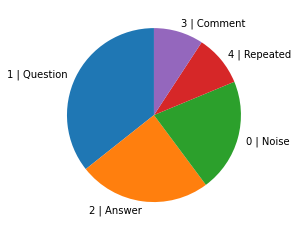

In [312]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(df.Type.value_counts())
mylabels = ["1 | Question","2 | Answer","0 | Noise", "4 | Repeated", "3 | Comment"]

plt.pie(y,  labels=mylabels,startangle = 90)
#plt.legend()
plt.show()

### Removeing repeated tweets 

In [313]:
repeated= df[df['Type'] == 4]
df=df[df['Type'] != 4]

### count number of emojies in each tweet and store it in a new column 

In [314]:
df['emoji']=df['Tweet'].apply(emoji_count)

In [315]:
df['emoji'].value_counts()

0     1997
1      127
4       68
2       51
10      20
6       17
3       17
9       15
5        8
7        5
8        4
12       2
16       2
Name: emoji, dtype: int64

### see distrubtion of tweets types having less than two emojie 

In [316]:
tweets_without_emoji=df.loc[df['emoji']<2]
tweets_without_emoji['Type'].value_counts()

1.0    917
2.0    631
0.0    344
3.0    232
Name: Type, dtype: int64

([<matplotlib.axis.XTick at 0x7fed0de07a30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

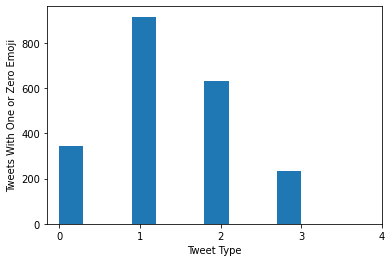

In [317]:
plt.hist(tweets_without_emoji['Type'])
plt.xlabel('Tweet Type')
plt.ylabel('Tweets With One or Zero Emoji')
plt.xticks([0,1,2,3,4])

### see distrubtion of tweets types having 2 emojies or more

In [318]:
tweets_with_emoji=df.loc[df['emoji']>1]
tweets_with_emoji['Type'].value_counts()

0.0    199
3.0      6
1.0      2
2.0      1
Name: Type, dtype: int64

([<matplotlib.axis.XTick at 0x7fecfa10a6a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

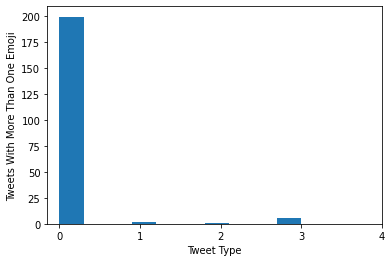

In [319]:
plt.hist(tweets_with_emoji['Type'])
plt.xlabel('Tweet Type')
plt.ylabel('Tweets With More Than One Emoji')
plt.xticks([0,1,2,3,4])

### most tweets that have emojis are of category = 1 which is 'noise' so the information of emoji is helpful in classification thus should not be removed, instead we will put the word explaining them

start executing helper functions on tweets to clean them

In [320]:
df['Cleaned_Tweet']=df['Tweet'].apply(remove_numbers_and_latin_chars)

In [321]:
df['Cleaned_Tweet']=df['Cleaned_Tweet'].apply(convert_emoji_to_text)

Now we will translate each english word that is result from emoji description to the word "ايموجي" 

In [322]:
df['Translated_Tweets']=df['Cleaned_Tweet'].apply(change_emoji_description)

In [323]:
df['Cleaned_Tweet_No_Stop_words']=df['Translated_Tweets'].apply(remove_stop_word)

In [324]:
df.head(2)

,Tweet,Type,emoji,Cleaned_Tweet,Translated_Tweets,Cleaned_Tweet_No_Stop_words
0,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...,1.0,0,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...
1,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...,1.0,0,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...


In [349]:
df['Tokens']=df.Cleaned_Tweet_No_Stop_words.apply(tokenize_word)
df.head(2)

,Tweet,Type,emoji,Cleaned_Tweet,Translated_Tweets,Cleaned_Tweet_No_Stop_words,repeated,Tokens
0,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...,1.0,0,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...,0,"[السلام, عليكم, لدي, عامل, انتهي, جواز, السفر,..."
1,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...,1.0,0,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...,0,"[سلام, عليكم, عندي, اضافه, مولود, ولما, ادخل, ..."


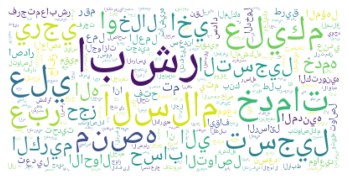

In [395]:
word_cloud_array=prepare_cloud_word(df['Tokens'])

show_cloud(word_cloud_array)

In below part, if a tweet is repeated(type=4), insert 1 in the 'repeated' column, else insert 0

### remove NANs

In [326]:
df.Cleaned_Tweet_No_Stop_words.dropna(inplace=True)

In [327]:
df.Type.dropna(inplace=True)

In [328]:
df=df.loc[df.Type.isnull()==False]
df=df.loc[df.Tweet.isnull()==False]

### Splitting data into train and test

In [329]:
#Split the data into X and y data sets
X = df['Cleaned_Tweet_No_Stop_words']
y = df.Type

In [330]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create TF-IDF of the tweets

In [331]:
#Create TF-IDF versions 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer()
X_train_tfidf1 = tfidf1.fit_transform(X_train)#.astype('float16')
X_test_tfidf1  = tfidf1.transform(X_test)#.astype('float16')

### Baseline model using Logistic Regression

In [332]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [333]:
# Train the first model
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1 = lr.predict(X_test_tfidf1)

In [334]:
#Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred_tfidf1, digits=3))

              precision    recall  f1-score   support

         0.0      0.932     0.804     0.863       102
         1.0      0.756     0.979     0.853       187
         2.0      0.968     0.863     0.913       139
         3.0      0.462     0.154     0.231        39

    accuracy                          0.837       467
   macro avg      0.779     0.700     0.715       467
weighted avg      0.833     0.837     0.821       467



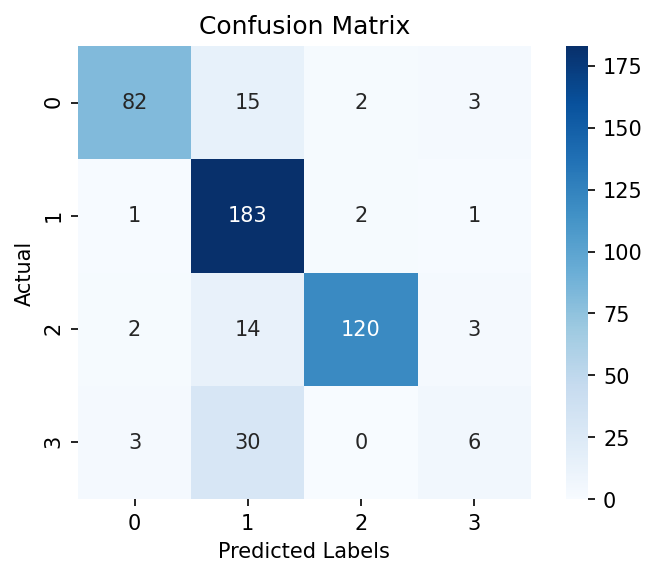

In [335]:
show_confusion_matrix(y_test,y_pred_tfidf1)

## Dimensionality Reducion using SVD

In [400]:
svd = TruncatedSVD(n_iter=30, n_components=100)
#Reduce the dimensions of data from 5000 to 100
x_train_SVD = svd.fit_transform(X_train_tfidf1)
x_test_SVD = svd.fit_transform(X_test_tfidf1)

In [401]:
# Train the first model
lr.fit(x_train_SVD, y_train)
y_pred_tfidf1_SVD = lr.predict(x_test_SVD)

In [402]:
#Print the precision and recall, among other metrics
print(metrics.classification_report(y_test,y_pred_tfidf1_SVD, digits=3))

              precision    recall  f1-score   support

         0.0      0.383     0.608     0.470       102
         1.0      0.563     0.594     0.578       187
         2.0      0.803     0.381     0.517       139
         3.0      0.119     0.128     0.123        39

    accuracy                          0.495       467
   macro avg      0.467     0.428     0.422       467
weighted avg      0.558     0.495     0.498       467



## Neural Networks 

In [339]:
X_train_tfidf1_array=X_train_tfidf1.toarray()
X_test_tfidf1_array=X_test_tfidf1.toarray()

In [340]:
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [426]:
# build a model
X=X_train_tfidf1_array

model = Sequential()
model.add(Dense(units=32, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(units=4, activation='sigmoid'))
model.summary()

# compile the model
model.compile(optimizer='nadam', 
              loss='sparse_categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 32)                167264    
                                                                 
 dense_68 (Dense)            (None, 4)                 132       
                                                                 
Total params: 167,396
Trainable params: 167,396
Non-trainable params: 0
_________________________________________________________________


In [432]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=20, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X,
                    y_train,
                    callbacks=[es],
                    epochs=800, # you can set this to a big number!
                    batch_size=20,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/800
75/75 [==============================] - 0s 6ms/step - loss: 0.0923 - accuracy: 0.9846 - val_loss: 0.4050 - val_accuracy: 0.8552
Epoch 2/800
75/75 [==============================] - 1s 8ms/step - loss: 0.0761 - accuracy: 0.9859 - val_loss: 0.4101 - val_accuracy: 0.8579
Epoch 3/800
75/75 [==============================] - 0s 6ms/step - loss: 0.0653 - accuracy: 0.9893 - val_loss: 0.4152 - val_accuracy: 0.8633
Epoch 4/800
75/75 [==============================] - 0s 5ms/step - loss: 0.0574 - accuracy: 0.9886 - val_loss: 0.4156 - val_accuracy: 0.8633
Epoch 5/800
75/75 [==============================] - 0s 5ms/step - loss: 0.0515 - accuracy: 0.9893 - val_loss: 0.4234 - val_accuracy: 0.8633
Epoch 6/800
75/75 [==============================] - 0s 6ms/step - loss: 0.0471 - accuracy: 0.9906 - val_loss: 0.4260 - val_accuracy: 0.8660
Epoch 7/800
75/75 [==============================] - 0s 5ms/step - loss: 0.0435 - accuracy: 0.9899 - val_loss: 0.4316 - val_accuracy: 0.8606
Epoch 8/800
7

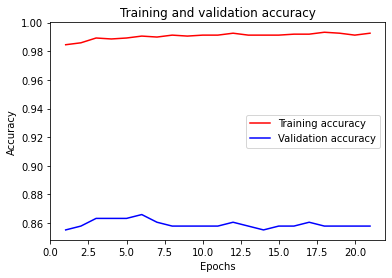

In [433]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [434]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X) 

matrix = confusion_matrix(y_train, preds.argmax(axis=1))
print('          --------Training Performance---------\n')
print(classification_report(y_train, preds.argmax(axis=1)))

          --------Training Performance---------

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       440
         1.0       0.96      0.98      0.97       732
         2.0       0.98      0.97      0.97       493
         3.0       0.87      0.87      0.87       199

    accuracy                           0.96      1864
   macro avg       0.95      0.95      0.95      1864
weighted avg       0.96      0.96      0.96      1864



In [435]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X_test_tfidf1_array)


matrix = confusion_matrix(y_test, preds.argmax(axis=1))
print('          --------Validating Performance---------\n')
print(classification_report(y_test, preds.argmax(axis=1)))

          --------Validating Performance---------

              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87       102
         1.0       0.82      0.96      0.88       187
         2.0       0.96      0.89      0.93       139
         3.0       0.59      0.49      0.54        39

    accuracy                           0.87       467
   macro avg       0.83      0.79      0.80       467
weighted avg       0.87      0.87      0.86       467



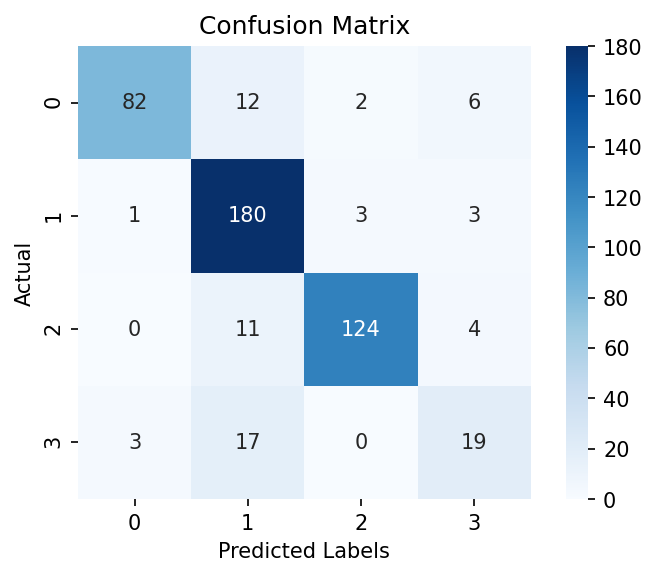

In [436]:
show_confusion_matrix(y_test, preds.argmax(axis=1))

In [407]:
# ROC 